In [1]:
import numpy as np
from pandas import read_csv, DataFrame
from math import isnan
from pylab import *

from sklearn.ensemble       import ExtraTreesRegressor
from sklearn.neighbors      import KNeighborsRegressor
from sklearn.linear_model   import LinearRegression
from sklearn.svm            import SVR
from sklearn.ensemble       import RandomForestRegressor
from sklearn.ensemble       import GradientBoostingRegressor
from sklearn.linear_model   import Ridge

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Загрузка данных
df = read_csv('test_ml.txt', sep="\t")

In [3]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x24,x25,x26,x27,x28,x29,x30,x31,x32,y
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,...,608.0,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.044868,0.028668,0.022648,0.023339,0.302632,0.279605,0.050987,0.500000,0.157895,0.032023,...,0.0,0.005724,0.144539,0.360132,0.468273,0.921299,0.106859,0.063076,0.461546,0.504276
std,0.171420,0.138941,0.142750,0.114780,0.459775,0.449175,0.220152,0.500412,0.364943,0.173790,...,0.0,0.064981,0.209985,0.209827,0.191106,0.044497,0.198035,0.130972,0.266834,0.071904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.200000,0.880000,0.000000,0.000000,0.080000,0.340000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.010000,0.220000,0.300000,0.880000,0.000000,0.000000,0.280000,0.450000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.000000,0.050000,0.315000,0.440000,0.890000,0.010000,0.020000,0.460000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.172500,0.480000,0.590000,0.960000,0.090000,0.040000,0.700000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Функция для проверки на корреляцию
def corr_function(df, max_corr=0.8):
    
    # Матрица корреляции элментов
    matrix_corr = df.corr()

    # Список для хранения параметров, которые буде удалять
    corr_list = []

    # Добавим в наш список все элеементы корреляция коорых между собой нас не устраивет
    for i in range(1, len(matrix_corr)):
        for j in range(i +1, len(matrix_corr)):
            # Если значение корреляции больше, чем допуспимое значение
            if matrix_corr['x' + str(i)]['x' + str(j)] > max_corr:
                # Смотрим какой из параметров меньше коррелирует с 'y' и добавляем его в список для дальнейшего удаления
                if matrix_corr['x' + str(i)]['y'] > matrix_corr['x' + str(j)]['y']: corr_list.append('x' + str(j))
                else: corr_list.append('x' + str(i))

    # Проверим значения, которые никак не коррелируют с 'y'
    for i in range(1, len(matrix_corr['y'])):
        if isnan(matrix_corr['y']['x' + str(i)]) ==  True: corr_list.append('x' + str(i))

    corr_list = list(set(corr_list)) 
    #print (corr_list)
    temp = df.drop (corr_list, axis = 1)
    return (temp)

In [5]:
# Формирование X и Y
temp = corr_function(df, 0.80)
X = temp.drop(['y'], axis = 1)
Y = temp [['y']]

In [6]:
# Автоматический подбор парметров
from sklearn.feature_selection import RFE
model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')

rfe = RFE(model)
rfe = rfe.fit(X, Y)

x_list = []

i = 0
for item in X.columns:
    if rfe.support_[i] == True:
        x_list.append(item)
    i += 1

print (x_list)

# Уберем лишниые параметры
X = df [x_list]
Y = df [['y']]

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['x4', 'x7', 'x9', 'x12', 'x14', 'x18', 'x23', 'x26', 'x27', 'x29', 'x30', 'x32']


In [7]:
X.describe()

,x4,x7,x9,x12,x14,x18,x23,x26,x27,x29,x30,x32
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.023339,0.050987,0.157895,0.033421,0.030938,0.077648,0.829556,0.144539,0.360132,0.921299,0.106859,0.461546
std,0.114780,0.220152,0.364943,0.173015,0.149548,0.251144,0.072813,0.209985,0.209827,0.044497,0.198035,0.266834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000,0.000000,0.000000,0.880000,0.000000,0.080000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.010000,0.220000,0.880000,0.000000,0.280000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.840000,0.050000,0.315000,0.890000,0.010000,0.460000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.890000,0.172500,0.480000,0.960000,0.090000,0.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Разбиваем данные случайным образом на тренировачную и тестовую выборки
def get_data():
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    return (x_train, x_test, y_train, y_test)

In [9]:
# Попробуем следующие модели и посмотрим какая из них лучше отрабатывает
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(), # метод опорных векторов с линейным ядром
          GradientBoostingRegressor(),
          Ridge(),
          ExtraTreesRegressor()
         ]

In [10]:
# Посмотрим насколько эффективна каждая модель

# Здесь будем хранить результаты
TestModels = DataFrame()
tmp = {}

# Для каждой модели из списка
for model in models:
    # Получаем имя модели
    m = str(model)
    name_model = m[:m.index('(')]
    tmp['Model'] = name_model
    
    x_train, x_test, y_train, y_test =  get_data()
    # Обучаем модель
    model.fit(x_train, y_train) 

    # Вычисляем коэффициент детерминации
    tmp['R2_Y'] = r2_score(y_test, model.predict(x_test))
    
    # Записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

In [11]:
TestModels.head(len(models))

,R2_Y
Model,
LinearRegression,0.503181
RandomForestRegressor,0.603033
KNeighborsRegressor,0.619776
SVR,0.393073
GradientBoostingRegressor,0.657800
Ridge,0.426874
ExtraTreesRegressor,0.659865


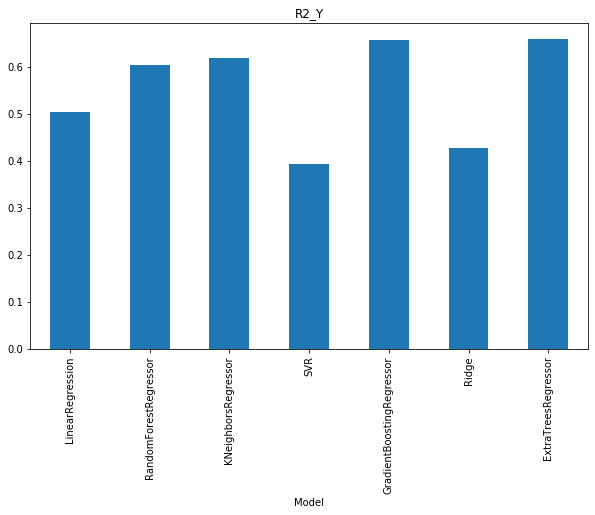

In [12]:
from pylab import *
TestModels.R2_Y.plot(figsize=(10,6), kind='bar', title='R2_Y')

In [13]:
# Структура для результатов
dfModels = DataFrame()
temp = {}

n = 100
# Ддля каждой модели из списка
for model in models:
    # Получаем имя модели
    m = str(model)
    name_model = m[:m.index('(')]
    temp['Model'] = name_model
    
    summ = 0
    for i in range(n):
        x_train, x_test, y_train, y_test =  get_data()
        # Обучаем модель
        model.fit(x_train, y_train) 
        summ += r2_score(y_test, model.predict(x_test))
    # Вычисляем коэффициент детерминации
    summ /= n
    temp['R2_Y'] = summ
    
    # Записываем данные и итоговый DataFrame
    dfModels = dfModels.append([temp])
    
# Делаем индекс по названию модели
dfModels.set_index('Model', inplace=True)

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vec

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vec

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vec

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:1

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vec

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vec

In [14]:
dfModels.head(len(models))

,R2_Y
Model,
LinearRegression,0.435659
RandomForestRegressor,0.660978
KNeighborsRegressor,0.556362
SVR,0.333487
GradientBoostingRegressor,0.646390
Ridge,0.427587
ExtraTreesRegressor,0.659675


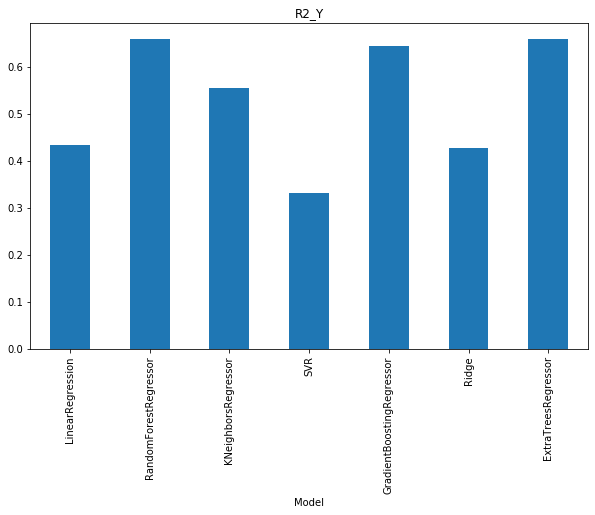

In [15]:
dfModels.R2_Y.plot(figsize=(10,6), kind='bar', title='R2_Y')

In [16]:
# Модель GradientBoostingRegressorе показала себя лучше всего - будем использовать ее

In [17]:
# Зайдем на оф. сайт и посмотрим какие гиперпараметры имеет данная модель

In [18]:
# Имеем следующий набор параметров

# loss=’ls’
# learning_rate=0.1
# n_estimators=100
# subsample=1.0
# criterion=’friedman_mse’
# min_samples_split=2
# min_samples_leaf=1
# min_weight_fraction_leaf=0.0
# max_depth=3
# min_impurity_decrease=0.0
# min_impurity_split=None
# init=None
# random_state=None
# max_features=None
# alpha=0.9
# verbose=0
# max_leaf_nodes=None
# warm_start=False
# presort=’auto’
# validation_fraction=0.1
# n_iter_no_change=None
# tol=0.0001

In [19]:
# Посмотрим как ведет сбя модель при разных значениях параметров и попробуем улучшить наш показатели
SETTINGS = {
    'learning_rate' : 0.3,
    'n_estimators' : 100,
    'max_depth' : 3,
    'min_samples_split' : 2,
    'subsample' : 1
}

temp_df = DataFrame()
temp = {}

x_train, x_test, y_train, y_test =  get_data()
for i in range(1, 11, 1):
    k = i / 10
    model = GradientBoostingRegressor(
        learning_rate = SETTINGS['learning_rate'],
        n_estimators = SETTINGS['n_estimators'],
        max_depth = SETTINGS['max_depth'],
        min_samples_split = SETTINGS['min_samples_split'],
        subsample = SETTINGS['subsample']
    )
    model.fit(x_train, y_train) 
    temp ['param'] = k
    temp ['R2'] = r2_score(y_test, model.predict(x_test))
    temp_df = temp_df.append([temp])
temp_df.set_index('param', inplace=True)

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [20]:
temp_df.head()

,R2
param,
0.1,0.789237
0.2,0.778159
0.3,0.798896
0.4,0.777093
0.5,0.786723


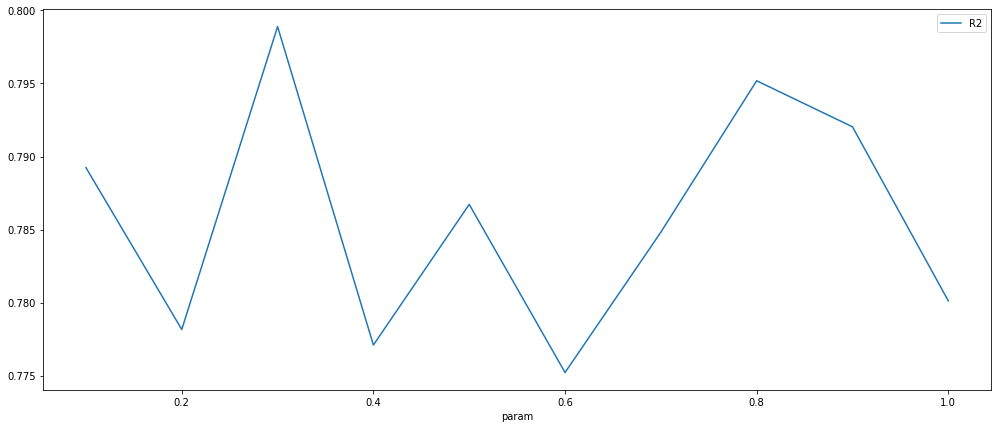

In [21]:
temp_df.plot(figsize=(17,7))


In [22]:
n = 100
summ_old = 0
summ_new = 0
for i in range(n):
    x_train, x_test, y_train, y_test = get_data()
    model_old = GradientBoostingRegressor ()
    model_old.fit(x_train, y_train)

    r2_old = r2_score(y_test, model_old.predict(x_test))
    model = GradientBoostingRegressor(
        learning_rate = SETTINGS['learning_rate'],
        n_estimators = SETTINGS['n_estimators'],
        max_depth = SETTINGS['max_depth'],
        min_samples_split = SETTINGS['min_samples_split'],
        subsample = SETTINGS['subsample']
    )
    model.fit(x_train, y_train)
    r2_new = r2_score(y_test, model.predict(x_test))

    summ_old += r2_old
    summ_new += r2_new
summ_old /= n
summ_new /= n

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [23]:
print ('Первоначальная модель:', round(summ_old*100, 2))
print ('Новая модель модель  :', round(summ_new*100, 2))
print ('Разнциа: ', round((summ_new-summ_old)*100, 2))

Первоначальная модель: 63.49
Новая модель модель  : 65.52
Разнциа:  2.04
